### 0. 必要なモジュールをimport してください（必要に応じて以下のセルに追記していくこと）

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_boston
import lightgbm as lgb

### 1. ボストン市の住宅価格データをscikit-learnから取得し、データフレームに格納すること。（なお、目的変数となる住宅価格は「PRICE」とすること)
### 説明変数と目的変数を一旦一つのデータフレームとしてください。

↓↓ 以下は、データセットの各カラムの説明 \
（参考） Boston house-prices (ボストン市の住宅価格) \
https://pythondatascience.plavox.info/scikit-learn/scikit-learn%E3%81%AB%E4%BB%98%E5%B1%9E%E3%81%97%E3%81%A6%E3%81%84%E3%82%8B%E3%83%87%E3%83%BC%E3%82%BF%E3%82%BB%E3%83%83%E3%83%88

In [2]:
# ボストン市の住宅価格のデータのインポート
# データフレーム型に変換
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df["PRICE"] = boston.target

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the C

### 2. 取得したデータで作成したデータフレームの先頭5行を表示すること

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 3. データフレームの要約統計量を確認すること

In [4]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### 4. 目的変数と説明変数に分けてください

In [5]:
X = df.loc[:, (df.columns != 'PRICE')]
y = df['PRICE']

### 5. データを訓練用とテスト用にしてください。今回は、scikit-learnのtrain_test_splitを使い、7:3に分割すること
- random_stateは0とすること

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 6. lightgbm.LGBMRegressorクラスのインスタンスを作成してください。
- ハイパーパラメータであるmax_depth=10, learning_rate=0.05, random_state=0 としてください。（その他はデフォルトでOK）

In [7]:
# n_estimators: ブースティングの回数(=学習する決定木の数)。デフォルトは100
# boosting_type: デフォルトは　（gbdt: Gradient Boosting Decision Tree）
# max_depth: 決定木の深さ　（デフォルトでは full treeまで学習してしまうので，何か値を入れておくとgood）
# learning_rate: デフォルトは0.1
# random_state: 乱数のシード
lr = 0.05
model = lgb.LGBMRegressor(max_depth=10, learning_rate=lr, random_state=0)

### 7. 学習用データ、検証用データ、コールバック関数を指定して学習を実行してください
- なお、コールバック関数には、early_stoppingとlog_evaluationを指定してください。

In [8]:
# (X, y)のリストで渡すと、ブースティング時の各イテレーションごとにこのデータセットを使って評価
eval_set = [(X_test, y_test)]

# 各イテレーションの際に実行するcallback関数のリスト
callbacks = []
callbacks.append(lgb.early_stopping(stopping_rounds=10))
callbacks.append(lgb.log_evaluation(10))

# .fit() に verbose や early_stopping_rounds 引数を渡すことで同様のことが可能だが、将来これらは callbacks に置き換わる
model.fit(X_train, y_train, eval_set=eval_set, callbacks=callbacks)

Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 43.3981
[20]	valid_0's l2: 29.0322
[30]	valid_0's l2: 23.9805
[40]	valid_0's l2: 21.5284
[50]	valid_0's l2: 20.6852
[60]	valid_0's l2: 20.1541
[70]	valid_0's l2: 19.7386
[80]	valid_0's l2: 19.4049
[90]	valid_0's l2: 19.2655
[100]	valid_0's l2: 19.1584
Did not meet early stopping. Best iteration is:
[99]	valid_0's l2: 19.1167


LGBMRegressor(learning_rate=0.05, max_depth=10, random_state=0)

### 8. 学習済みのmodelについて、「best_iteration_」, 「best_score_」を表示し、確認してください。

In [9]:
display(model.best_iteration_)
display(model.best_score_)

99

defaultdict(collections.OrderedDict,
            {'valid_0': OrderedDict([('l2', 19.116712153329903)])})

### 9. 検証用データを用い予測値を計算し、評価指標であるRMSE, R^2（決定係数）を算出してください。

In [10]:
y_pred = model.predict(X_test)
# 回帰の誤差関数はL2(MSE)
display(np.sqrt(mean_squared_error(y_test, y_pred)))
display(r2_score(y_test, y_pred))

4.372266232958869

0.7704125762259105

### 10. 学習したモデルの学習曲線を表示してください。

<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='l2'>

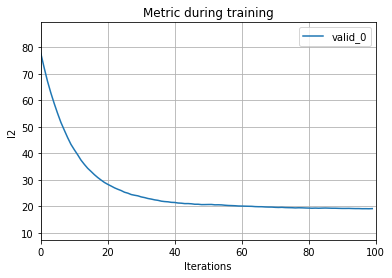

In [11]:
# 学習曲線を表示
lgb.plot_metric(model)

### 11. 今回の学習モデルの変数の重要度を確認してください。

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

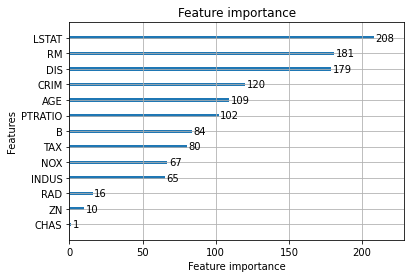

In [12]:
lgb.plot_importance(model)